In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import KFold

%matplotlib inline

# Load the cricket player dataset
data = pd.read_csv('cricket.csv')
rate = data['RATE']
features = data.drop(['Id','Name','RATE'], axis = 1)
    
# Success
print ("Cricket Player dataset has {} data points with {} variables each.".format(*data.shape))
data.head()

Cricket Player dataset has 60 data points with 8 variables each.


,Id,Name,Age,Match,AVG,SR,Team Point,RATE
0,1,V.Kholi,29,202,55.74,91.73,6680,876
1,2,A.B.de Villiers,33,225,54.06,101.07,6686,872
2,3,D.A Warner,31,101,44.94,96.58,5948,865
3,4,Babar Azam,23,38,55.25,85.61,4684,846
4,5,R.G Sharma,30,174,45.23,87.08,6680,816


In [402]:
minimum_rating = np.min(rate)
maximum_rating = np.max(rate)
mean_rating = np.mean(rate)
median_rating = np.median(rate)
std_rating = np.std(rate)

print("Statistics for rating dataset:\n")
print("Minimum rating: {:,.2f}".format(minimum_rating))
print("Maximum rating: {:,.2f}".format(maximum_rating))
print("Mean rating: {:,.2f}".format(mean_rating))
print("Median rating {:,.2f}".format(median_rating))
print("Standard deviation of rating: {:,.2f}".format(std_rating))

Statistics for rating dataset:

Minimum rating: 357.00
Maximum rating: 876.00
Mean rating: 572.02
Median rating 522.00
Standard deviation of rating: 142.66


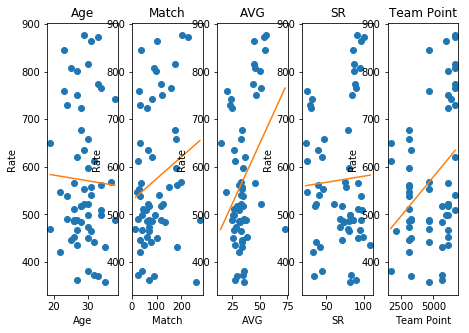

In [403]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

# i: index
for i, col in enumerate(features.columns):
    plt.subplot(1, 10, i+1)
    x = data[col]
    y = rate
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Rate')

In [404]:
r21_s=mns1_s=mna1_s=mda1_s=0
r22_s=mns2_s=mna2_s=mda2_s=0
r23_s=mns3_s=mna3_s=mda3_s=0
r24_s=mns4_s=mna4_s=mda4_s=0
r25_s=mns5_s=mna5_s=mda5_s=0


In [405]:
#Standarized the features
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(features)
features = scalerX.transform(features)

In [406]:
# function for calculating the perormance scores
def score(y_true, y_pred):
    
    #r2 score
    #from sklearn.metrics import r2_score
    r2_scr = metrics.r2_score(y_true,y_pred)
    
    #mean square error
    #from sklearn.metrics import mean_squared_error
    mean_sqr_err = metrics.mean_squared_error(y_true, y_pred)
    
    #mean absolute error
    #from sklearn.metrics import mean_absolute_error
    mean_abslt_err = metrics.mean_absolute_error(y_true, y_pred)
    
    #mediad absolute error
    #from sklearn.metrics import median_absolute_error
    median_abslt_err = metrics.median_absolute_error(y_true, y_pred)
    
    return r2_scr, mean_sqr_err, mean_abslt_err, median_abslt_err

In [407]:
#for 5 folds
k=5
kf= KFold(n_splits=k, shuffle=True)
#spiliting the data for training and testing using KFold



In [408]:
#Linear_Regression:
for train_index, test_index in kf.split(features,rate):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = rate[train_index], rate[test_index]

    from sklearn.linear_model import LinearRegression

    regressor = LinearRegression()
    pred1 = regressor.fit(X_train, y_train)
    y_pred1 = pred1.predict(X_test)

    # calculaing r2 score, mean square error, mean absolute error, mediad absolute error
    r21,mns1,mna1,mda1 = score(y_test,y_pred1)

    #sum of each r2 score, mean square error, mean absolute error, mediad absolute error from each fold
    r21_s = r21_s + r21
    mns1_s = mns1_s + mns1
    mna1_s = mna1_s + mna1
    mda1_s = mda1_s + mda1

print("Average R^2 Score: ", r21_s/k)
print("Average Mean Square Error: ", mns1_s/k)
print("Average Mean Absolute Error : ", mna1_s/k)
print("Average Median Absolute Error : ", mda1/k)

Average R^2 Score:  -0.132770327596
Average Mean Square Error:  21796.2025309
Average Mean Absolute Error :  118.553953151
Average Median Absolute Error :  22.1691067585


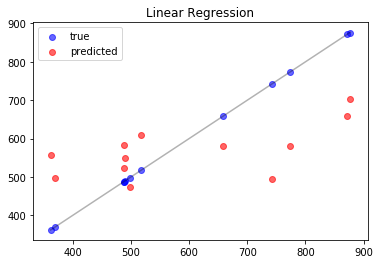

In [409]:
true_handle = plt.scatter(y_test, y_test, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(y_test,y_test,1))
lims = np.linspace(min(y_test) - 1, max(y_test) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(y_test, y_pred1, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.title('Linear Regression')
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

In [410]:
# Produce a matrix for new player
player_data = [[29, 217, 55, 91, 6000]] # player 1

# Show predictions
for i, rating in enumerate(pred1.predict(player_data)):
    print ("Predicted rating for Player {}'s : {:,.2f}".format(i+1, rating))

Predicted rating for Player 1's : 227,478.07


In [411]:
#Decision_Tree_Regression:
for train_index, test_index in kf.split(features,rate):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = rate[train_index], rate[test_index]
    
    from sklearn.tree import DecisionTreeRegressor
    
    regressor = DecisionTreeRegressor()
    pred2 = regressor.fit(X_train, y_train)
    y_pred2 = pred2.predict(X_test)
    
    # calculaing r2 score, mean square error, mean absolute error, mediad absolute error
    r22,mns2,mna2,mda2 = score(y_test,y_pred2)

    #sum of each r2 score, mean square error, mean absolute error, mediad absolute error from each fold
    r22_s = r22_s + r22
    mns2_s = mns2_s + mns2
    mna2_s = mna2_s + mna2
    mda2_s = mda2_s + mda2

print("Average R^2 Score: ", r22_s/k)
print("Average Mean Square Error: ", mns2_s/k)
print("Average Mean Absolute Error : ", mna2_s/k)
print("Average Median Absolute Error : ", mda2/k)

Average R^2 Score:  0.18109982534
Average Mean Square Error:  15151.1333333
Average Mean Absolute Error :  91.4333333333
Average Median Absolute Error :  24.5


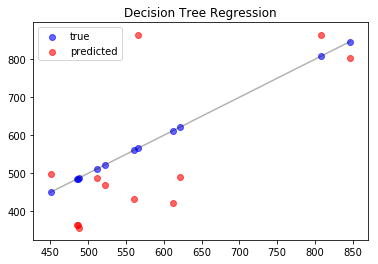

In [412]:
true_handle = plt.scatter(y_test, y_test, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(y_test,y_test,1))
lims = np.linspace(min(y_test) - 1, max(y_test) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(y_test, y_pred2, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.title('Decision Tree Regression')
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

In [413]:
# Produce a matrix for new player
player_data = [[29, 217, 55, 91, 6000]] # player 1

# Show predictions
for i, rating in enumerate(pred2.predict(player_data)):
    print ("Predicted rating for Player {}'s : {:,.2f}".format(i+1, rating))

Predicted rating for Player 1's : 872.00


In [414]:
#Random_Forest_Regression:
for train_index, test_index in kf.split(features,rate):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = rate[train_index], rate[test_index]
    
    from sklearn.ensemble import RandomForestRegressor
    
    regressor = RandomForestRegressor(n_estimators=50)
    pred3 = regressor.fit(X_train, y_train)
    y_pred3 = pred3.predict(X_test)
    
    # calculaing r2 score, mean square error, mean absolute error, mediad absolute error
    r23,mns3,mna3,mda3 = score(y_test,y_pred3)

    #sum of each r2 score, mean square error, mean absolute error, mediad absolute error from each fold
    r23_s = r23_s + r23
    mns3_s = mns3_s + mns3
    mna3_s = mna3_s + mna3
    mda3_s = mda3_s + mda3

print("Average R^2 Score: ", r23_s/k)
print("Average Mean Square Error: ", mns3_s/k)
print("Average Mean Absolute Error : ", mna3_s/k)
print("Average Median Absolute Error : ", mda3/k)

Average R^2 Score:  0.474730556737
Average Mean Square Error:  9844.95478
Average Mean Absolute Error :  79.7823333333
Average Median Absolute Error :  9.422


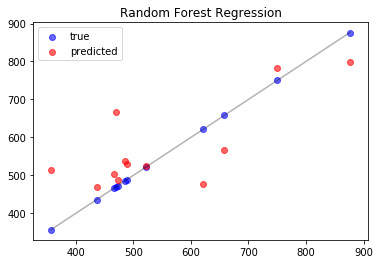

In [415]:
true_handle = plt.scatter(y_test, y_test, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(y_test,y_test,1))
lims = np.linspace(min(y_test) - 1, max(y_test) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(y_test, y_pred3, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.title('Random Forest Regression')
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

In [416]:
# Produce a matrix for new player
player_data = [[29, 217, 55, 91, 6000]] # player 1

# Show predictions
for i, rating in enumerate(pred3.predict(player_data)):
    print ("Predicted rating for Player {}'s : {:,.2f}".format(i+1, rating))

Predicted rating for Player 1's : 828.44


In [417]:
#KNN_Regression:
for train_index, test_index in kf.split(features,rate):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = rate[train_index], rate[test_index]

    from sklearn.neighbors import KNeighborsRegressor
    
    regressor = KNeighborsRegressor(n_neighbors=2)
    pred4 = regressor.fit(X_train, y_train)
    y_pred4 = pred4.predict(X_test)
    
     # calculaing r2 score, mean square error, mean absolute error, mediad absolute error
    r24,mns4,mna4,mda4 = score(y_test,y_pred4)

    #sum of each r2 score, mean square error, mean absolute error, mediad absolute error from each fold
    r24_s = r24_s + r24
    mns4_s = mns4_s + mns4
    mna4_s = mna4_s + mna4
    mda4_s = mda4_s + mda4

print("Average R^2 Score: ", r24_s/k)
print("Average Mean Square Error: ", mns4_s/k)
print("Average Mean Absolute Error : ", mna4_s/k)
print("Average Median Absolute Error : ", mda4/k)

Average R^2 Score:  -0.251449042487
Average Mean Square Error:  13705.9375
Average Mean Absolute Error :  85.375
Average Median Absolute Error :  10.6


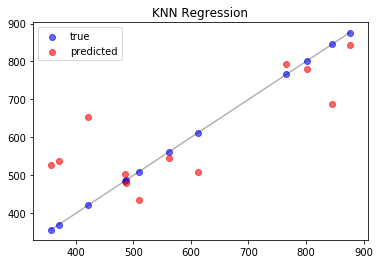

In [418]:
true_handle = plt.scatter(y_test, y_test, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(y_test,y_test,1))
lims = np.linspace(min(y_test) - 1, max(y_test) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(y_test, y_pred4, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.title('KNN Regression')
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

In [419]:
# Produce a matrix for new player
player_data = [[29, 217, 55, 91, 6000]] # player 1

# Show predictions
for i, rating in enumerate(pred4.predict(player_data)):
    print ("Predicted rating for Player {}'s : {:,.2f}".format(i+1, rating))

Predicted rating for Player 1's : 844.00


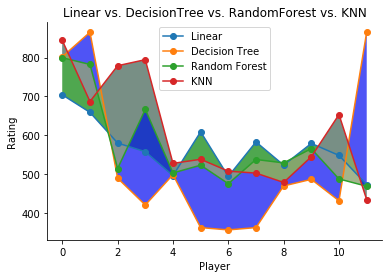

In [422]:
plt.figure()
plt.plot(y_pred1, '-o', y_pred2, '-o', y_pred3, '-o', y_pred4, '-o')
plt.gca().fill_between(range(len(y_pred1)), y_pred1, y_pred2, facecolor='green', alpha=0.1)
plt.gca().fill_between(range(len(y_pred1)), y_pred1, y_pred3, facecolor='green', alpha=0.3)
plt.gca().fill_between(range(len(y_pred1)), y_pred1, y_pred4, facecolor='green', alpha=0.5)
plt.gca().fill_between(range(len(y_pred2)), y_pred2, y_pred3, facecolor='blue', alpha=0.3)
plt.gca().fill_between(range(len(y_pred2)), y_pred2, y_pred4, facecolor='blue', alpha=0.5)
plt.gca().fill_between(range(len(y_pred3)), y_pred3, y_pred4, facecolor='yellow', alpha=0.3)

plt.title('Linear vs. DecisionTree vs. RandomForest vs. KNN')
plt.xlabel('Player')
plt.ylabel('Rating')
plt.legend(['Linear', 'Decision Tree', 'Random Forest','KNN'],loc='best')
sns.despine()